# Cleaning and merging data

In [1]:
import re
import pandas as pd
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plott
from matplotlib import cm


import warnings
warnings.filterwarnings("ignore")

In [2]:
def titleCleanUp(data):
    return re.sub("[^a-zA-Z0-9 ]", "", data)

**Opening the Books. It contains the following**
1. ISBN (change to bookid) : ID of the Book
2. Book-Title (change to title) : Title of Book
3. Year-Of-Publication (change to published_year) : Year the book was published
4. Publisher : Publisher of book


In [3]:
books = pd.read_csv('BX-Books.csv')
books.rename(columns={'ISBN':'bookid', 'Book-Title':'title','Book-Author':'author','Year-Of-Publication':'published_year', 'Publisher':'publisher'}, inplace=True)

In [4]:
#Removing the images and other unwanted coloumns
books.drop(columns={'Image-URL-S', 'Image-URL-M', 'Image-URL-L', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'}, inplace=True)
books

,bookid,title,author,published_year,publisher
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271374,440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271375,525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271376,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271377,192126040,Republic (World's Classics),Plato,1996,Oxford University Press


**Cleaning the data with checking number of null values**

In [5]:
books.isna().sum()

bookid            0
title             0
author            2
published_year    0
publisher         2
dtype: int64

In [6]:
books.dropna(inplace=True)

In [7]:
books.duplicated().sum()

1

In [8]:
books['title']=books['title'].apply(titleCleanUp)
books['author']=books['author'].apply(titleCleanUp)
books['publisher']=books['publisher'].apply(titleCleanUp)

In [9]:
# Get indices where 'published_year' contains alphabets
indices_with_alphabets = books[books['published_year'].str.contains('[a-zA-Z]', na=False)].index
# Drop these rows
books = books.drop(indices_with_alphabets)
books

,bookid,title,author,published_year,publisher
0,195153448,Classical Mythology,Mark P O Morford,2002,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,60973129,Decision in Normandy,Carlo DEste,1991,HarperPerennial
3,374157065,Flu The Story of the Great Influenza Pandemic ...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,393045218,The Mummies of Urumchi,E J W Barber,1999,W W Norton amp Company
...,...,...,...,...,...
271374,440400988,Theres a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub Mm
271375,525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271376,006008667X,Lily Dale The True Story of the Town that Tal...,Christine Wicker,2004,HarperSanFrancisco
271377,192126040,Republic Worlds Classics,Plato,1996,Oxford University Press


In [10]:
books['bookid'] = books['bookid'].str.upper()
books['published_year'] = books['published_year'].astype(int)

In [11]:
books= books.drop(books[books['published_year']==0].index)
books

,bookid,title,author,published_year,publisher
0,195153448,Classical Mythology,Mark P O Morford,2002,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,60973129,Decision in Normandy,Carlo DEste,1991,HarperPerennial
3,374157065,Flu The Story of the Great Influenza Pandemic ...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,393045218,The Mummies of Urumchi,E J W Barber,1999,W W Norton amp Company
...,...,...,...,...,...
271374,440400988,Theres a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub Mm
271375,525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271376,006008667X,Lily Dale The True Story of the Town that Tal...,Christine Wicker,2004,HarperSanFrancisco
271377,192126040,Republic Worlds Classics,Plato,1996,Oxford University Press


In [12]:
def clean_bookid(bookid):
    # Remove any non-numeric characters
    cleaned = re.sub(r'\D', '', bookid)
    # Convert to integer
    return int(cleaned) if cleaned else None

# Apply the cleaning function to the 'bookid' column
books['bookid'] = books['bookid'].apply(clean_bookid)

print(books)

           bookid                                              title  \
0       195153448                                Classical Mythology   
1         2005018                                       Clara Callan   
2        60973129                               Decision in Normandy   
3       374157065  Flu The Story of the Great Influenza Pandemic ...   
4       393045218                             The Mummies of Urumchi   
...           ...                                                ...   
271374  440400988                          Theres a Bat in Bunk Five   
271375  525447644                            From One to One Hundred   
271376    6008667  Lily Dale  The True Story of the Town that Tal...   
271377  192126040                           Republic Worlds Classics   
271378  767409752  A Guided Tour of Rene Descartes Meditations on...   

                      author  published_year  \
0           Mark P O Morford            2002   
1       Richard Bruce Wright           

In [13]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266735 entries, 0 to 271378
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   bookid          266735 non-null  int64 
 1   title           266735 non-null  object
 2   author          266735 non-null  object
 3   published_year  266735 non-null  int64 
 4   publisher       266735 non-null  object
dtypes: int64(2), object(3)
memory usage: 12.2+ MB


In [14]:
books=books.drop_duplicates(subset=['bookid'])
books

,bookid,title,author,published_year,publisher
0,195153448,Classical Mythology,Mark P O Morford,2002,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,60973129,Decision in Normandy,Carlo DEste,1991,HarperPerennial
3,374157065,Flu The Story of the Great Influenza Pandemic ...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,393045218,The Mummies of Urumchi,E J W Barber,1999,W W Norton amp Company
...,...,...,...,...,...
271374,440400988,Theres a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub Mm
271375,525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271376,6008667,Lily Dale The True Story of the Town that Tal...,Christine Wicker,2004,HarperSanFrancisco
271377,192126040,Republic Worlds Classics,Plato,1996,Oxford University Press


In [15]:
books.to_csv('Books.csv', index=False)













**Opening the Book Users data. It contains the following**

--> User-ID (Change to userid) : ID of the USER


In [16]:
users = pd.read_csv('BX-Users.csv')
users.rename(columns={'User-ID':'userid'}, inplace=True)
users

,userid,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [17]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   userid    278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


**Cleaning the data with checking number of null values**

In [18]:
users.isna().sum()

userid           0
Location         0
Age         110762
dtype: int64

In [19]:
#Since age has a large number of null values, we can drop the while coloumn
users.drop(columns={'Age'}, inplace=True)
users

,userid,Location
0,1,"nyc, new york, usa"
1,2,"stockton, california, usa"
2,3,"moscow, yukon territory, russia"
3,4,"porto, v.n.gaia, portugal"
4,5,"farnborough, hants, united kingdom"
...,...,...
278853,278854,"portland, oregon, usa"
278854,278855,"tacoma, washington, united kingdom"
278855,278856,"brampton, ontario, canada"
278856,278857,"knoxville, tennessee, usa"


In [20]:
# Create empty columns
users['city'] = 'unknown'
users['state'] = 'unknown'
users['country'] = 'unknown'

# Iterate over DataFrame indices using .iloc
for ind in range(len(users)):
    location = users.iloc[ind]['Location']
    if pd.notna(location):  # Check if Location is not NaN
        split_location = location.split(', ')
        if len(split_location) == 3:
            users.at[users.index[ind], 'city'] = split_location[0] if split_location[0] != 'n/a' else 'unknown'
            users.at[users.index[ind], 'state'] = split_location[1] if split_location[1] != 'n/a' else 'unknown'
            users.at[users.index[ind], 'country'] = split_location[2] if split_location[2] != 'n/a' else 'unknown'

# Drop the original 'Location' column if no longer needed
users.drop('Location', axis=1, inplace=True)

users


,userid,city,state,country
0,1,nyc,new york,usa
1,2,stockton,california,usa
2,3,moscow,yukon territory,russia
3,4,porto,v.n.gaia,portugal
4,5,farnborough,hants,united kingdom
...,...,...,...,...
278853,278854,portland,oregon,usa
278854,278855,tacoma,washington,united kingdom
278855,278856,brampton,ontario,canada
278856,278857,knoxville,tennessee,usa


In [21]:
users.duplicated().sum()

0

In [22]:
users.to_csv('users.csv', index=False)

**Opening the Book Ratings data. It contains the following**
1. User-ID (Change to userid) : ID of the USER
2. ISBN (change to bookid) : ID of the Book
3. Book-Rating (change to rating) : Rating the user has given to the book

In [23]:
rating = pd.read_csv('BX-Book-Ratings.csv')
rating.rename(columns={'User-ID':'userid', 'ISBN':'bookid','Book-Rating':'rating'}, inplace=True)
rating

,userid,bookid,rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6
...,...,...,...
999994,240144,373262345,8
999995,240144,373262787,0
999996,240144,037326285X,9
999997,240144,037326335X,0


In [24]:
def clean_bookid(bookid):
    # Remove any non-numeric characters
    cleaned = re.sub(r'\D', '', str(bookid))
    # Convert to integer
    return int(cleaned) if cleaned else None

# Apply the cleaning function to the 'bookid' column
rating['bookid'] = rating['bookid'].apply(clean_bookid)

In [25]:
rating['bookid'] = rating['bookid'].fillna(0).astype('int64')
rating = rating.dropna(subset=['bookid'])
rating['bookid'] = rating['bookid'].astype('int64')

In [26]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   userid  999999 non-null  int64
 1   bookid  999999 non-null  int64
 2   rating  999999 non-null  int64
dtypes: int64(3)
memory usage: 22.9 MB


**Cleaning the data with checking number of null values**

In [27]:
import pandas as pd
def categorize_rating(r):
    if r in range(1, 3):
        return 1
    elif r in range(3, 5):
        return 2
    elif r in range(5, 7):
        return 3
    elif r in range(7, 8):
        return 4
    else:
        return 5

# Apply the function to the 'rating' column
rating['rating'] = rating['rating'].apply(categorize_rating)
rating

,userid,bookid,rating
0,276725,34545104,5
1,276726,155061224,3
2,276727,446520802,5
3,276729,52165615,2
4,276729,521795028,3
...,...,...,...
999994,240144,373262345,5
999995,240144,373262787,5
999996,240144,37326285,5
999997,240144,37326335,5


In [28]:
#Since there are no null values, it works out well
rating.isna().sum()

userid    0
bookid    0
rating    0
dtype: int64

In [31]:
rating.duplicated().sum()

0

In [30]:
rating.drop_duplicates(inplace=True)
rating

,userid,bookid,rating
0,276725,34545104,5
1,276726,155061224,3
2,276727,446520802,5
3,276729,52165615,2
4,276729,521795028,3
...,...,...,...
999994,240144,373262345,5
999995,240144,373262787,5
999996,240144,37326285,5
999997,240144,37326335,5


In [32]:
rating.to_csv('BookRatings.csv', index=False)

In [33]:
completebooks=pd.merge(users,rating, on='userid', how='inner')
completebooks=pd.merge(completebooks,books, on='bookid', how='inner')
completebooks

,userid,city,state,country,bookid,rating,title,author,published_year,publisher
0,2,stockton,california,usa,195153448,5,Classical Mythology,Mark P O Morford,2002,Oxford University Press
1,7,washington,dc,usa,34542252,5,Rose,Martin Cruz Smith,2000,Ballantine Books
2,20060,baltimore,maryland,usa,34542252,5,Rose,Martin Cruz Smith,2000,Ballantine Books
3,29756,fresno,california,usa,34542252,5,Rose,Martin Cruz Smith,2000,Ballantine Books
4,35859,duluth,minnesota,usa,34542252,5,Rose,Martin Cruz Smith,2000,Ballantine Books
...,...,...,...,...,...,...,...,...,...,...
885711,278851,dallas,texas,usa,743203763,5,As Hogan Said The 389 Best Things Anyone S...,Randy Voorhees,2000,Simon amp Schuster
885712,278851,dallas,texas,usa,767907566,3,All Elevations Unknown An Adventure in the Hea...,Sam Lightner,2001,Broadway Books
885713,278851,dallas,texas,usa,884159221,4,Why stop A guide to Texas historical roadside ...,Claude Dooley,1985,Lone Star Books
885714,278851,dallas,texas,usa,912333022,4,The Are You Being Served Stories Camping In an...,Jeremy Lloyd,1997,Kqed Books


In [34]:
completebooks[completebooks.duplicated()]

,userid,city,state,country,bookid,rating,title,author,published_year,publisher


In [35]:
completebooks.drop_duplicates(inplace=True)
completebooks

,userid,city,state,country,bookid,rating,title,author,published_year,publisher
0,2,stockton,california,usa,195153448,5,Classical Mythology,Mark P O Morford,2002,Oxford University Press
1,7,washington,dc,usa,34542252,5,Rose,Martin Cruz Smith,2000,Ballantine Books
2,20060,baltimore,maryland,usa,34542252,5,Rose,Martin Cruz Smith,2000,Ballantine Books
3,29756,fresno,california,usa,34542252,5,Rose,Martin Cruz Smith,2000,Ballantine Books
4,35859,duluth,minnesota,usa,34542252,5,Rose,Martin Cruz Smith,2000,Ballantine Books
...,...,...,...,...,...,...,...,...,...,...
885711,278851,dallas,texas,usa,743203763,5,As Hogan Said The 389 Best Things Anyone S...,Randy Voorhees,2000,Simon amp Schuster
885712,278851,dallas,texas,usa,767907566,3,All Elevations Unknown An Adventure in the Hea...,Sam Lightner,2001,Broadway Books
885713,278851,dallas,texas,usa,884159221,4,Why stop A guide to Texas historical roadside ...,Claude Dooley,1985,Lone Star Books
885714,278851,dallas,texas,usa,912333022,4,The Are You Being Served Stories Camping In an...,Jeremy Lloyd,1997,Kqed Books


In [36]:
completebooks.to_csv('completeBookData.csv', index=False)

# Exploring the data and Visualizing it

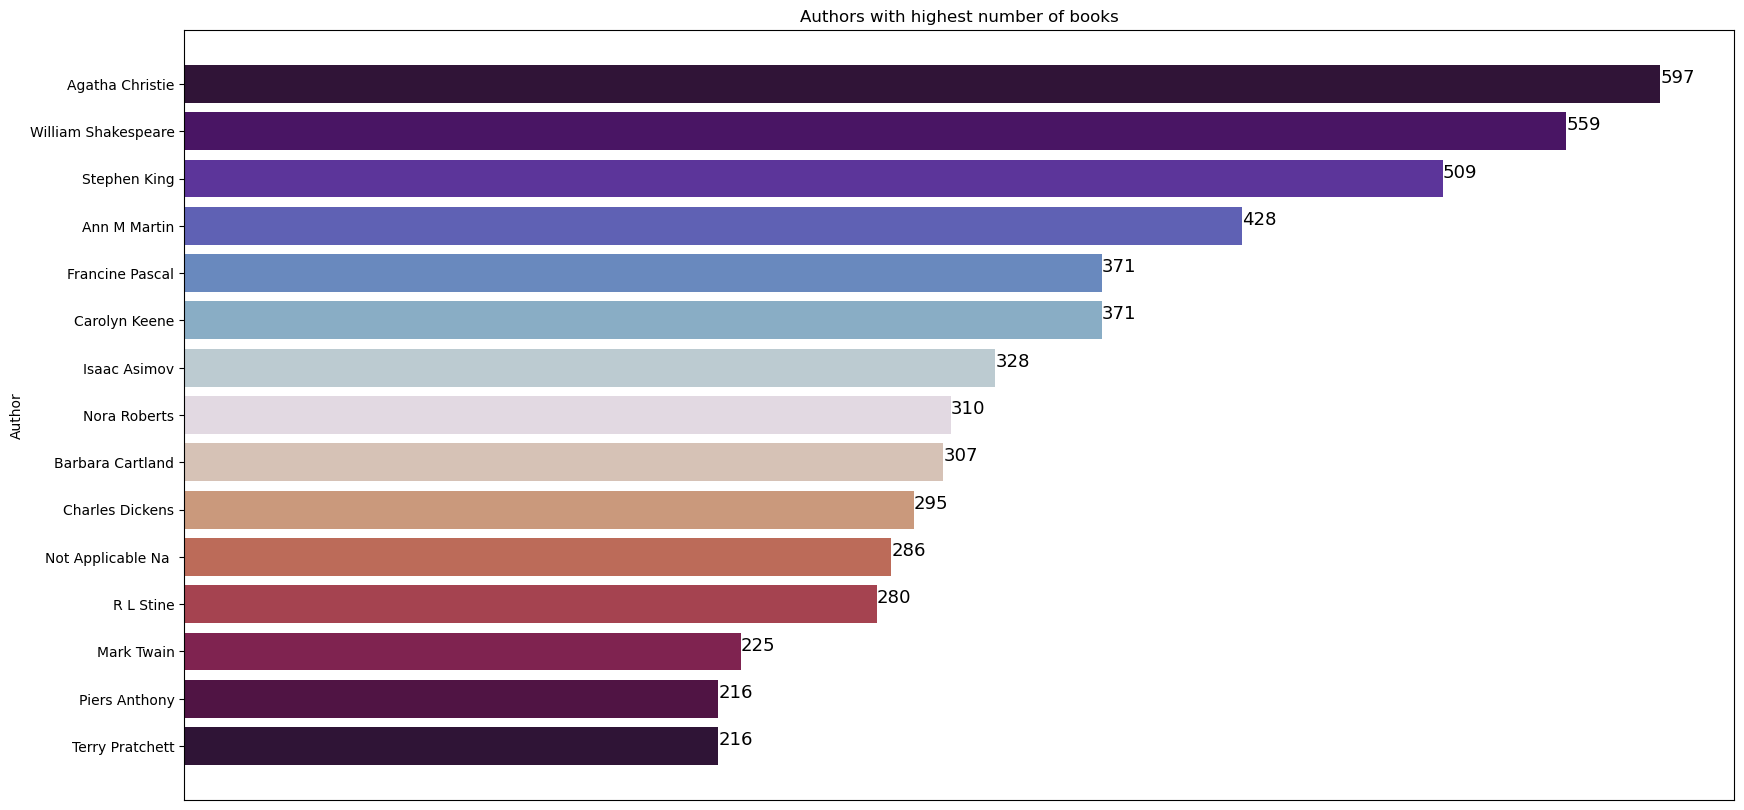

In [37]:
data = books['author'].value_counts().head(15)
authors = data.index
counts = data.values

colors = cm.get_cmap('twilight_shifted', len(authors))

plott.figure(figsize=(20, 10))
bars = plott.barh(authors, counts, color=colors(range(len(authors))))

plott.title("Authors with highest number of books")
plott.xlabel("Number of Books")
plott.ylabel("Author")

for bar in bars:
    width = bar.get_width()
    plott.text(width, bar.get_y() + bar.get_height()/3, f'{width}', 
             va='center', ha='left', fontsize=13, color='black')
plott.gca().axes.get_xaxis().set_visible(False)
plott.gca().invert_yaxis()
plott.show()

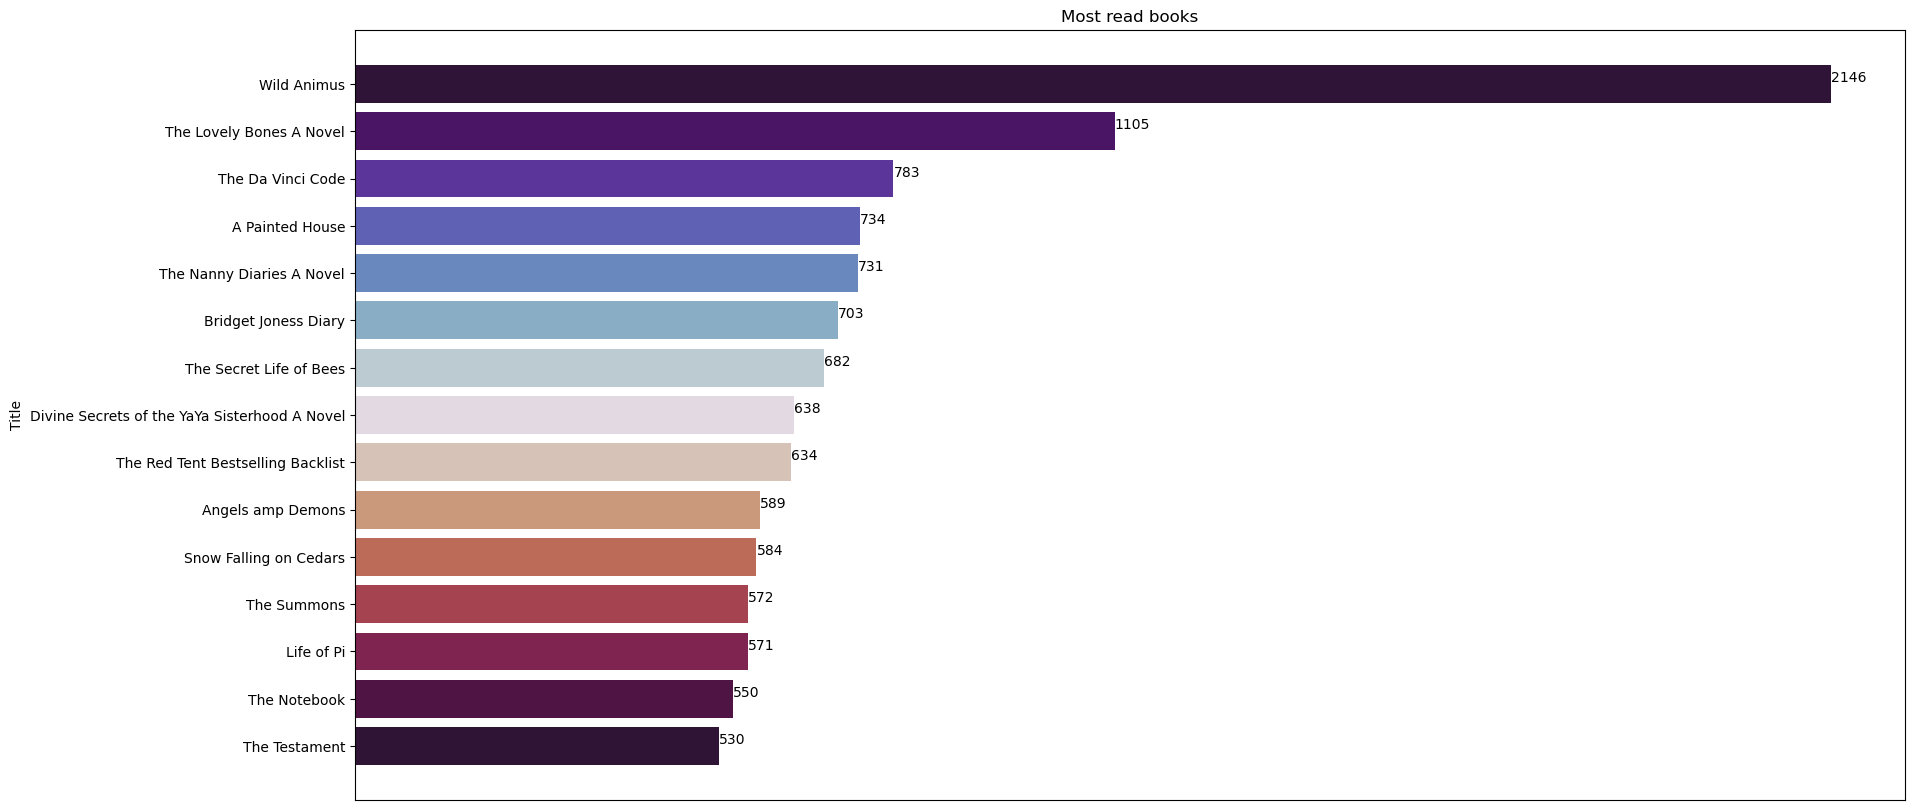

In [38]:
data = completebooks['title'].value_counts().head(15)
authors = data.index
counts = data.values

colors = cm.get_cmap('twilight_shifted', len(authors))

plott.figure(figsize=(20, 10))
bars = plott.barh(authors, counts, color=colors(range(len(authors))))

plott.title("Most read books")
plott.xlabel("Number of Books")
plott.ylabel("Title")

for bar in bars:
    width = bar.get_width()
    plott.text(width, bar.get_y() + bar.get_height()/3, f'{width}', 
             va='center', ha='left', fontsize=10, color='black')
plott.gca().axes.get_xaxis().set_visible(False)
plott.gca().invert_yaxis()
plott.show()

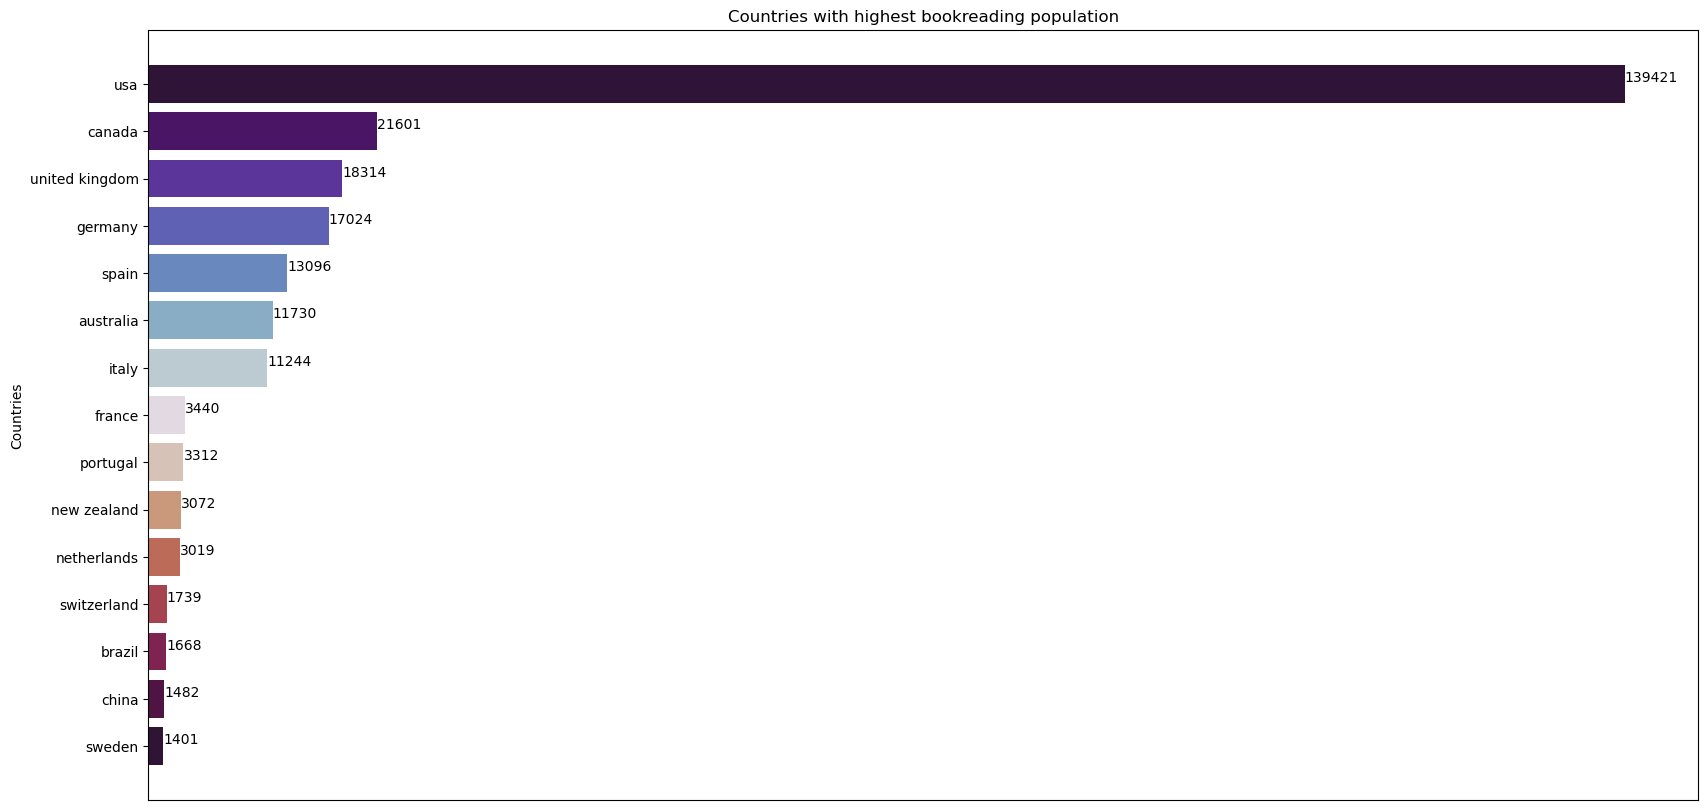

In [39]:
data = users['country'].value_counts().head(16)
data = data[data.index != 'unknown']
authors = data.index
counts = data.values

colors = cm.get_cmap('twilight_shifted', len(authors))

plott.figure(figsize=(20, 10))
bars = plott.barh(authors, counts, color=colors(range(len(authors))))

plott.title("Countries with highest bookreading population")
plott.xlabel("Number of Books")
plott.ylabel("Countries")

for bar in bars:
    width = bar.get_width()
    plott.text(width, bar.get_y() + bar.get_height()/3, f'{width}', 
             va='center', ha='left', fontsize=10, color='black')
plott.gca().axes.get_xaxis().set_visible(False)
plott.gca().invert_yaxis()
plott.show()

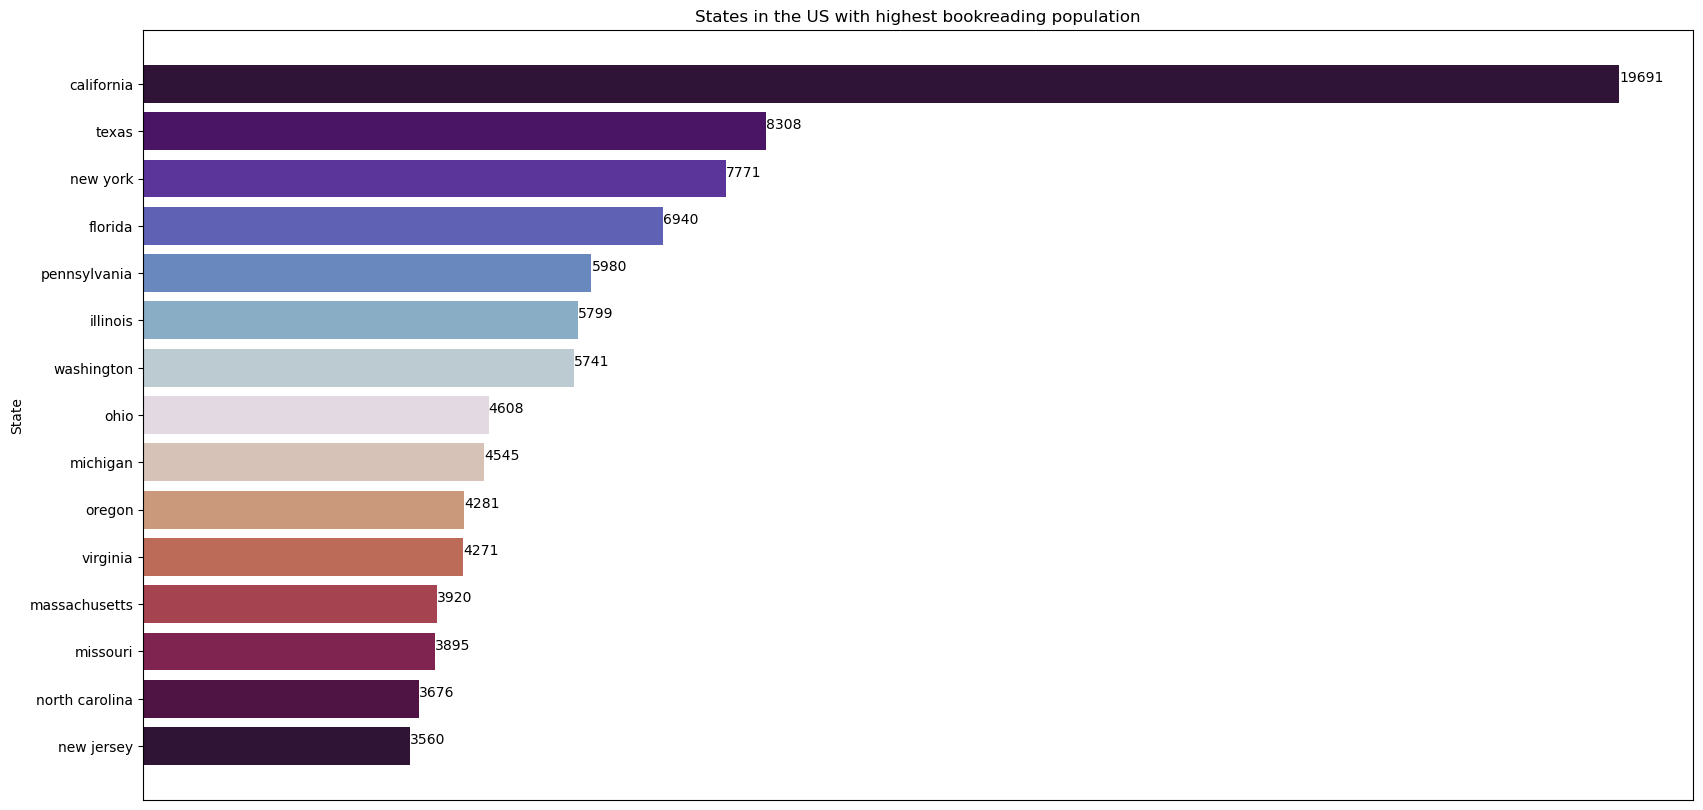

In [40]:
data = users[users['country'] == 'usa']['state'].value_counts().head(15)
authors = data.index
counts = data.values

colors = cm.get_cmap('twilight_shifted', len(authors))

plott.figure(figsize=(20, 10))
bars = plott.barh(authors, counts, color=colors(range(len(authors))))

plott.title("States in the US with highest bookreading population")
plott.xlabel("Number of Books")
plott.ylabel("State")

for bar in bars:
    width = bar.get_width()
    plott.text(width, bar.get_y() + bar.get_height()/3, f'{width}', 
             va='center', ha='left', fontsize=10, color='black')
plott.gca().axes.get_xaxis().set_visible(False)
plott.gca().invert_yaxis()
plott.show()